The below code demonstrates the process of generating synthetic photometric data, training various regression models, and evaluating their performance in predicting a target variable, redshift. The primary purpose is to assess the performance of machine learning models like Random Forest Regressor, Gradient Boosting Regressor, Support Vector Regressor, and Linear Regression in predicting synthetic redshift values derived from SDSS-like photometric features (`u`, `g`, `r`, `i`, `z`).

### Step-by-Step Explanation:

1. **Import Libraries**: The code imports essential libraries like `numpy` for numerical computations, `pandas` for data manipulation, `matplotlib` for visualization, and `sklearn` for implementing machine learning models and evaluation metrics.

2. **Data Generation**: Synthetic data representing SDSS photometric features is generated. Five features (`u`, `g`, `r`, `i`, `z`) are created with relationships mimicking real-world photometric data. A target variable, `redshift`, is synthesized as a function of these features with added noise.

3. **DataFrame Creation**: The generated data is organized into a `pandas` DataFrame with columns for the features and the target variable.

4. **Data Splitting**: The dataset is divided into training and testing sets using `train_test_split`, with 80% for training and 20% for testing, ensuring model evaluation on unseen data.

5. **Model Definition**: A dictionary of regression models (`RandomForestRegressor`, `GradientBoostingRegressor`, `SVR`, and `LinearRegression`) is defined for comparative evaluation.

6. **Training and Evaluation**: Each model is trained on the training dataset. Predictions on the test dataset are evaluated using two metrics:
   - **Mean Squared Error (MSE)**: Measures prediction error.
   - **R² Score**: Assesses the model's explained variance.

7. **Result Storage**: Predictions, MSE, and R² scores are stored in a dictionary for comparison.

8. **Visualization**: Scatter plots for each model display the relationship between true and predicted redshift values, with an ideal fit line for reference.


Random Forest Regressor Performance:
MSE: 0.0122
R^2: 0.8140

Gradient Boosting Regressor Performance:
MSE: 0.0107
R^2: 0.8367

Support Vector Regressor Performance:
MSE: 0.0104
R^2: 0.8418

Linear Regression Performance:
MSE: 0.0104
R^2: 0.8408


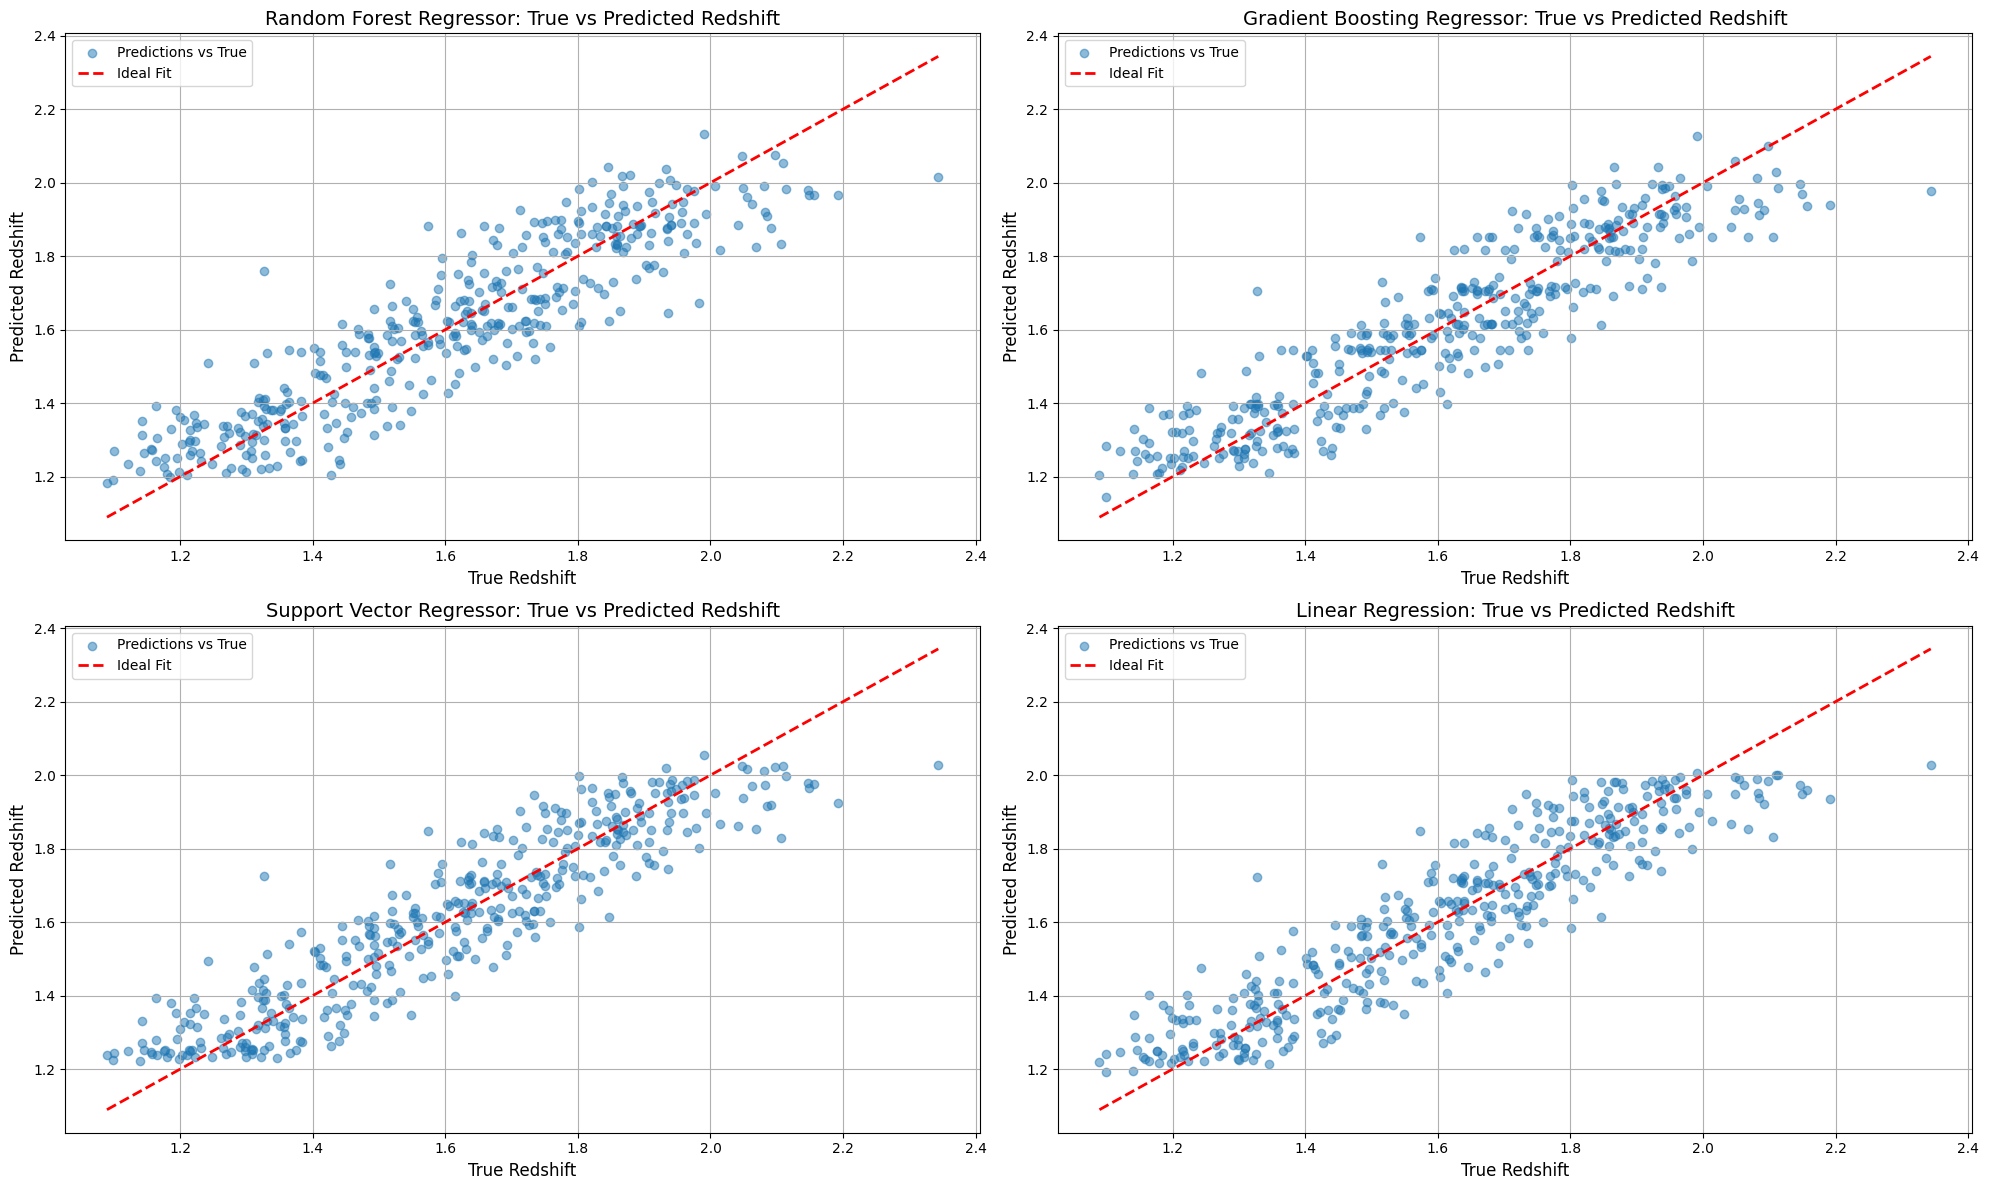

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Synthetic Data Generation (based on SDSS features)
# Assuming we have 5 features representing photometric data (ugriz filters)
N = 2000  # Number of data points
u = np.random.uniform(15, 25, N)
g = u - np.random.normal(1, 0.3, N)
r = g - np.random.normal(0.5, 0.2, N)
i = r - np.random.normal(0.3, 0.1, N)
z = i - np.random.normal(0.2, 0.1, N)
redshift = 0.1 * u - 0.05 * g + 0.03 * r + np.random.normal(0, 0.1, N)  # Synthetic redshift relation

# Create DataFrame to hold the synthetic data
data = pd.DataFrame({'u': u, 'g': g, 'r': r, 'i': i, 'z': z, 'redshift': redshift})

# Splitting the dataset into training and testing sets
X = data[['u', 'g', 'r', 'i', 'z']]
y = data['redshift']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model information
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}

# Dictionary to store predictions and evaluation metrics
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'y_pred': y_pred,
        'MSE': mse,
        'R2': r2
    }
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R^2: {r2:.4f}")

# Visualization: Plotting all models side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for ax, (name, result) in zip(axes, results.items()):
    ax.scatter(y_test, result['y_pred'], alpha=0.5, label='Predictions vs True')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    ax.set_xlabel('True Redshift', fontsize=12)
    ax.set_ylabel('Predicted Redshift', fontsize=12)
    ax.set_title(f'{name}: True vs Predicted Redshift', fontsize=14)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


This Python script demonstrates a workflow for analyzing synthetic photometric data to predict redshifts, leveraging various machine learning models. It begins by generating a synthetic dataset with 2000 samples based on five photometric features (`u`, `g`, `r`, `i`, `z`) and a redshift target, simulating SDSS astronomical data. The code performs comprehensive Exploratory Data Analysis (EDA), including summary statistics, distribution visualizations, correlation heatmaps, boxplots, and scatter plots, to understand feature relationships and identify data patterns.

The dataset is split into training and testing subsets, and four regression models—Random Forest, Gradient Boosting, Support Vector Regression (SVR), and Linear Regression—are trained to predict redshifts. Each model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics. The results are visualized with scatter plots comparing predicted and true redshifts, emphasizing prediction accuracy. This end-to-end process showcases data preparation, visualization, model training, and evaluation in an astronomical context.


--- Exploratory Data Analysis (EDA) ---

Summary Statistics:
                u          g          r          i          z   redshift
count  2000.0000  2000.0000  2000.0000  2000.0000  2000.0000  2000.0000
mean     19.9864    18.9841    18.4916    18.1944    17.9926     1.6013
std       2.9221     2.9313     2.9441     2.9463     2.9496     0.2548
min      15.0322    13.4776    12.6137    12.1421    11.6699     0.9241
25%      17.3805    16.3742    15.8665    15.5777    15.3433     1.3938
50%      20.0735    19.0698    18.6123    18.3205    18.0962     1.6070
75%      22.5068    21.4430    21.0108    20.7226    20.5410     1.8059
max      24.9972    24.6860    24.5684    24.2550    24.0445     2.3437


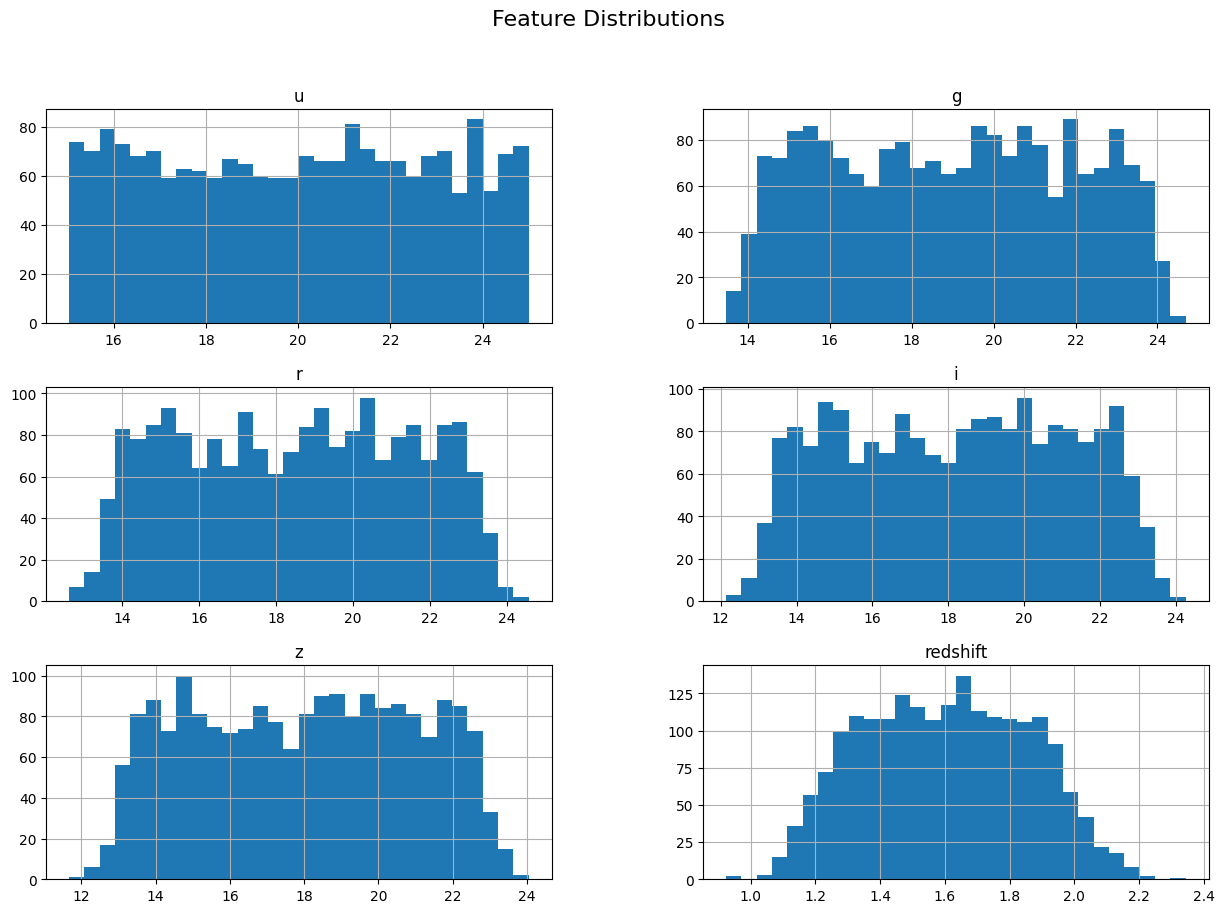

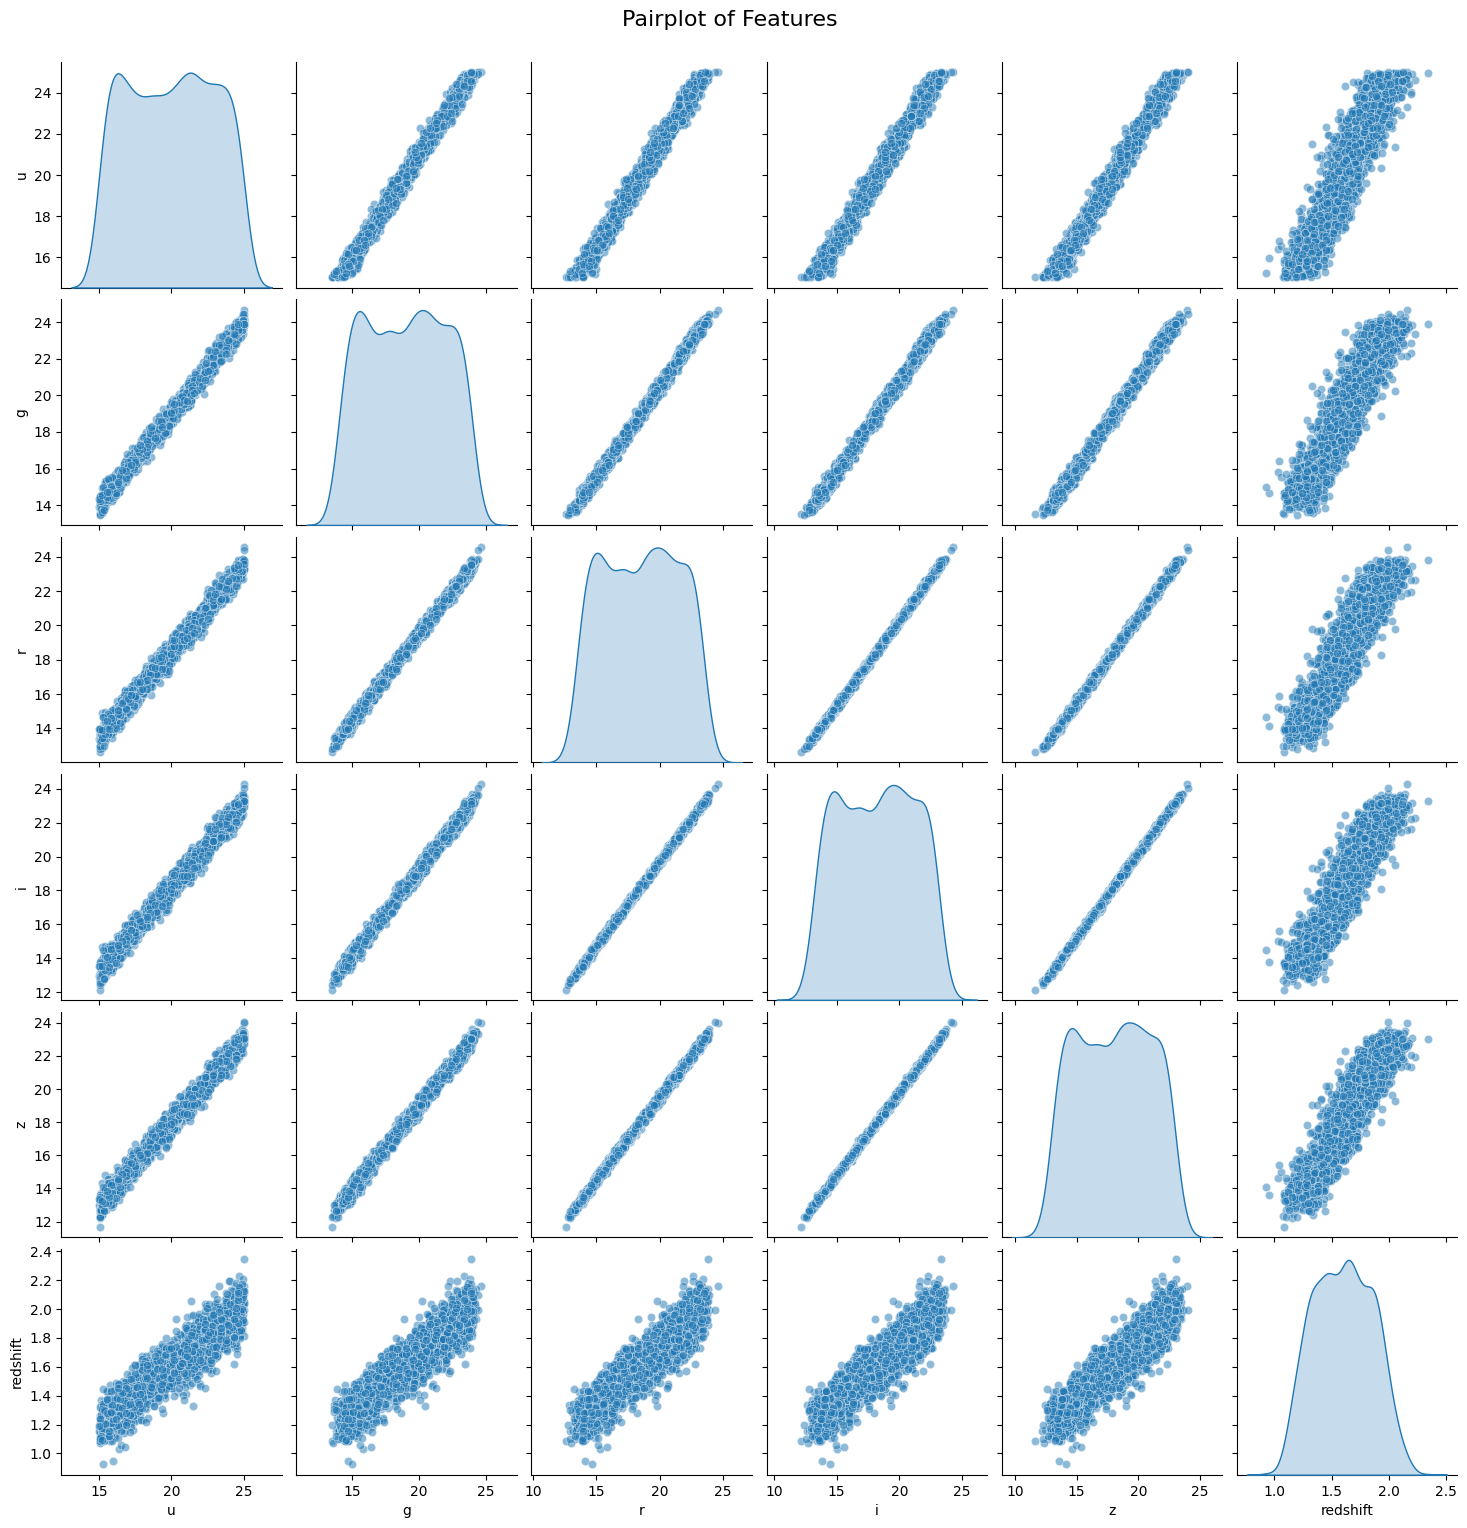

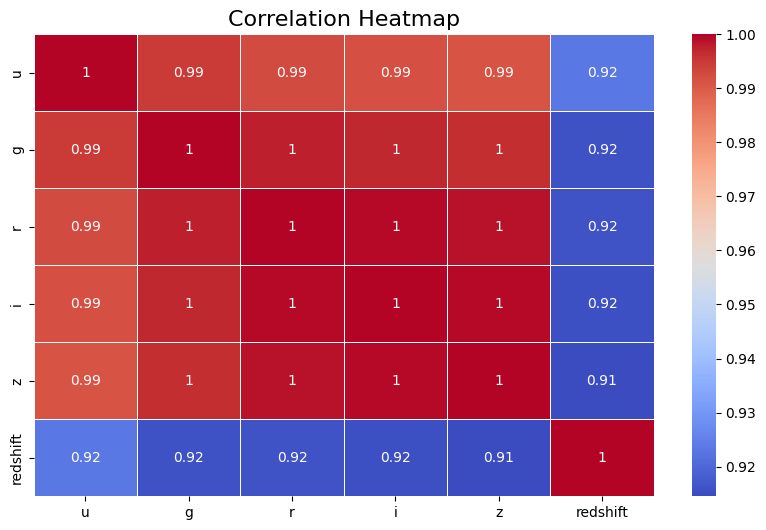

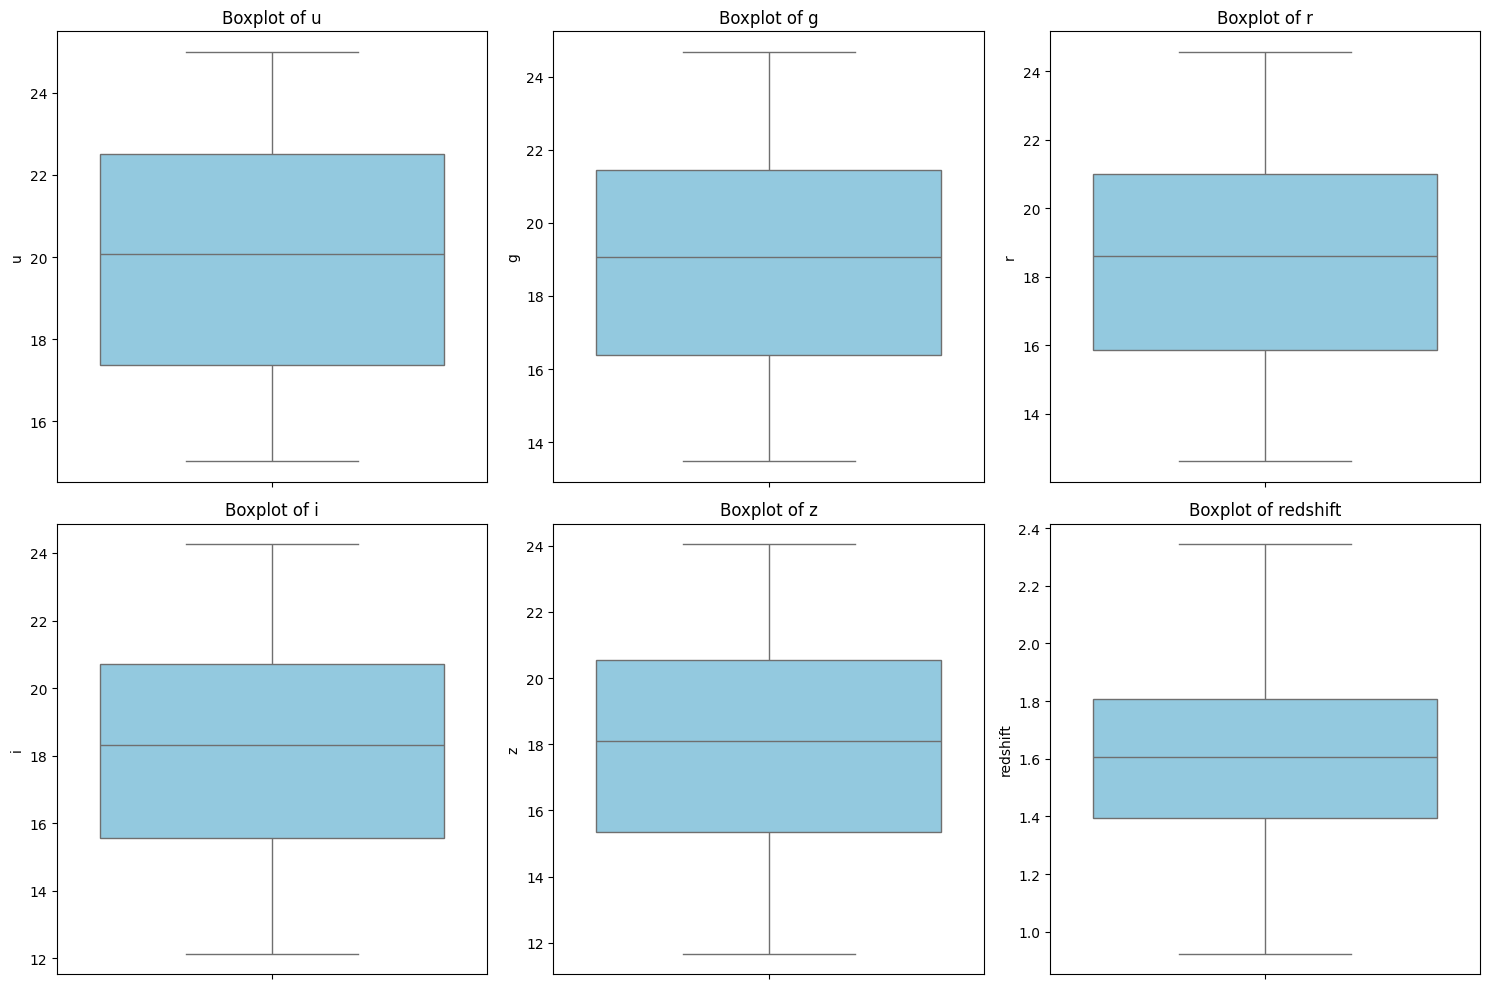

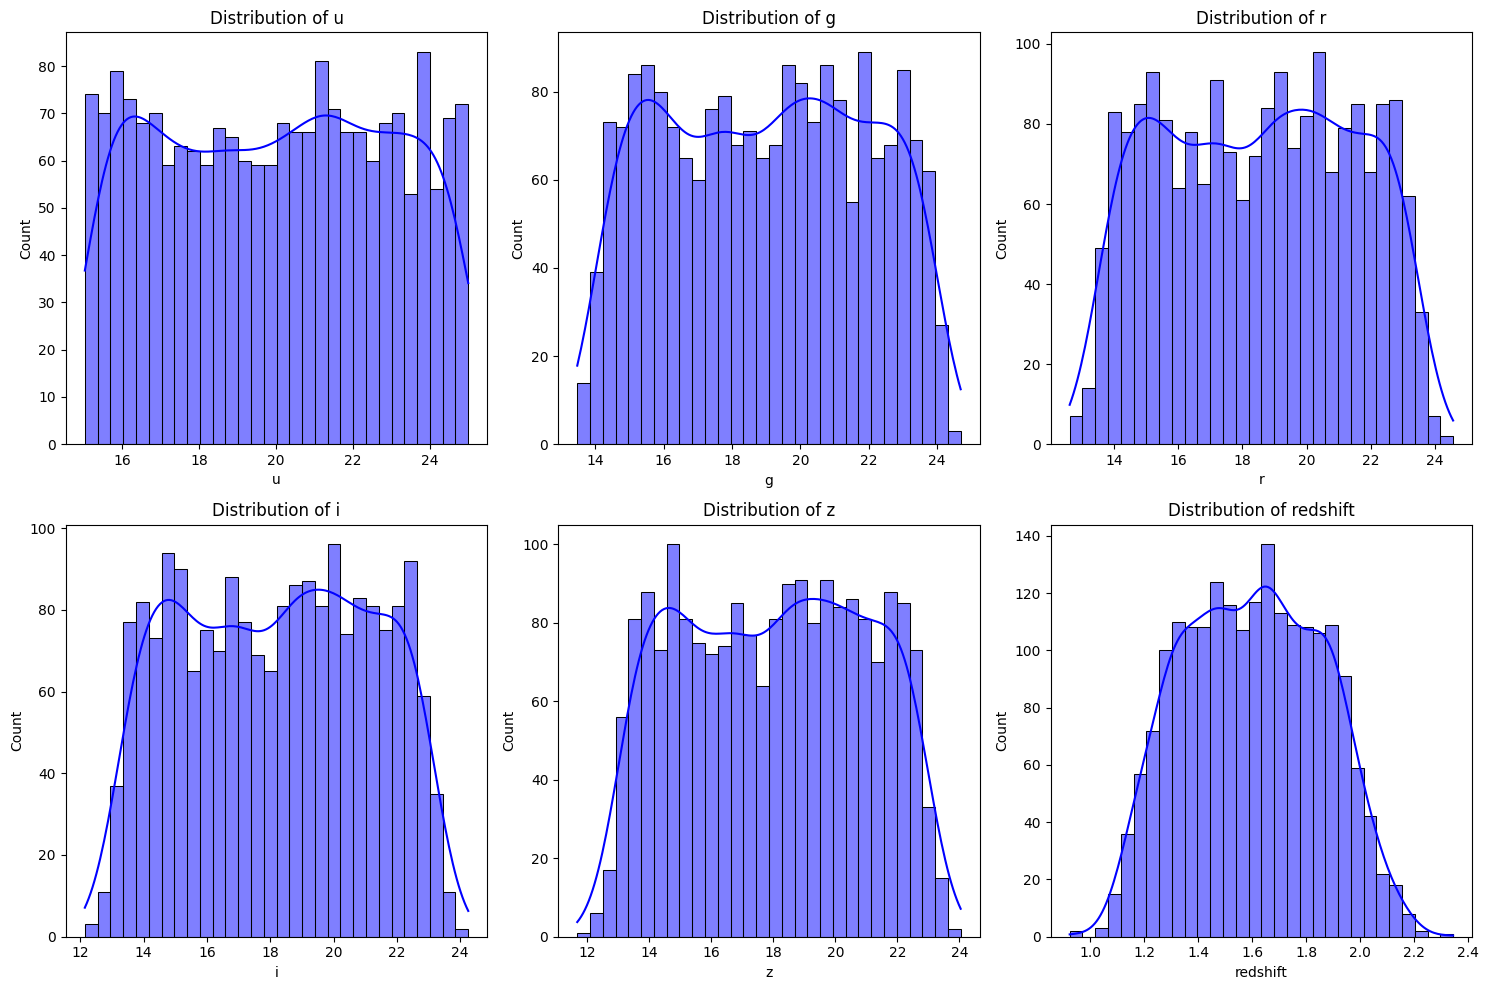

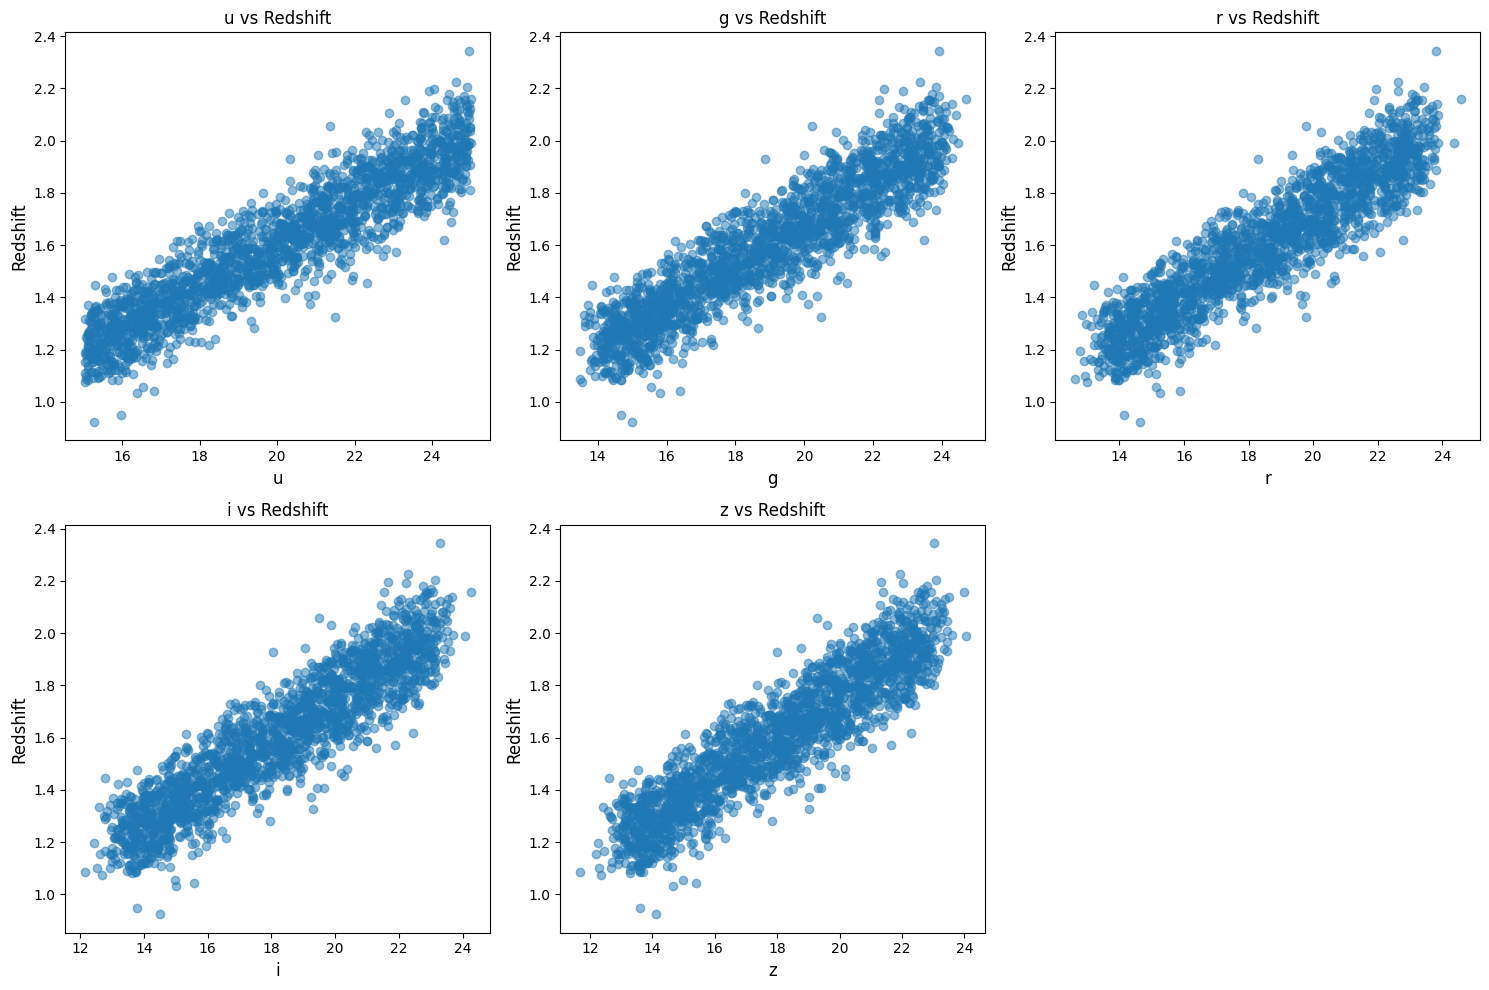


Skewness of features:
u          -0.0102
g          -0.0079
r          -0.0161
i          -0.0211
z          -0.0179
redshift    0.0350
dtype: float64

Kurtosis of features:
u          -1.2269
g          -1.1991
r          -1.1853
i          -1.1815
z          -1.1744
redshift   -0.8533
dtype: float64

Random Forest Regressor Performance:
MSE: 0.0122
R^2: 0.8140

Gradient Boosting Regressor Performance:
MSE: 0.0107
R^2: 0.8367

Support Vector Regressor Performance:
MSE: 0.0104
R^2: 0.8418

Linear Regression Performance:
MSE: 0.0104
R^2: 0.8408


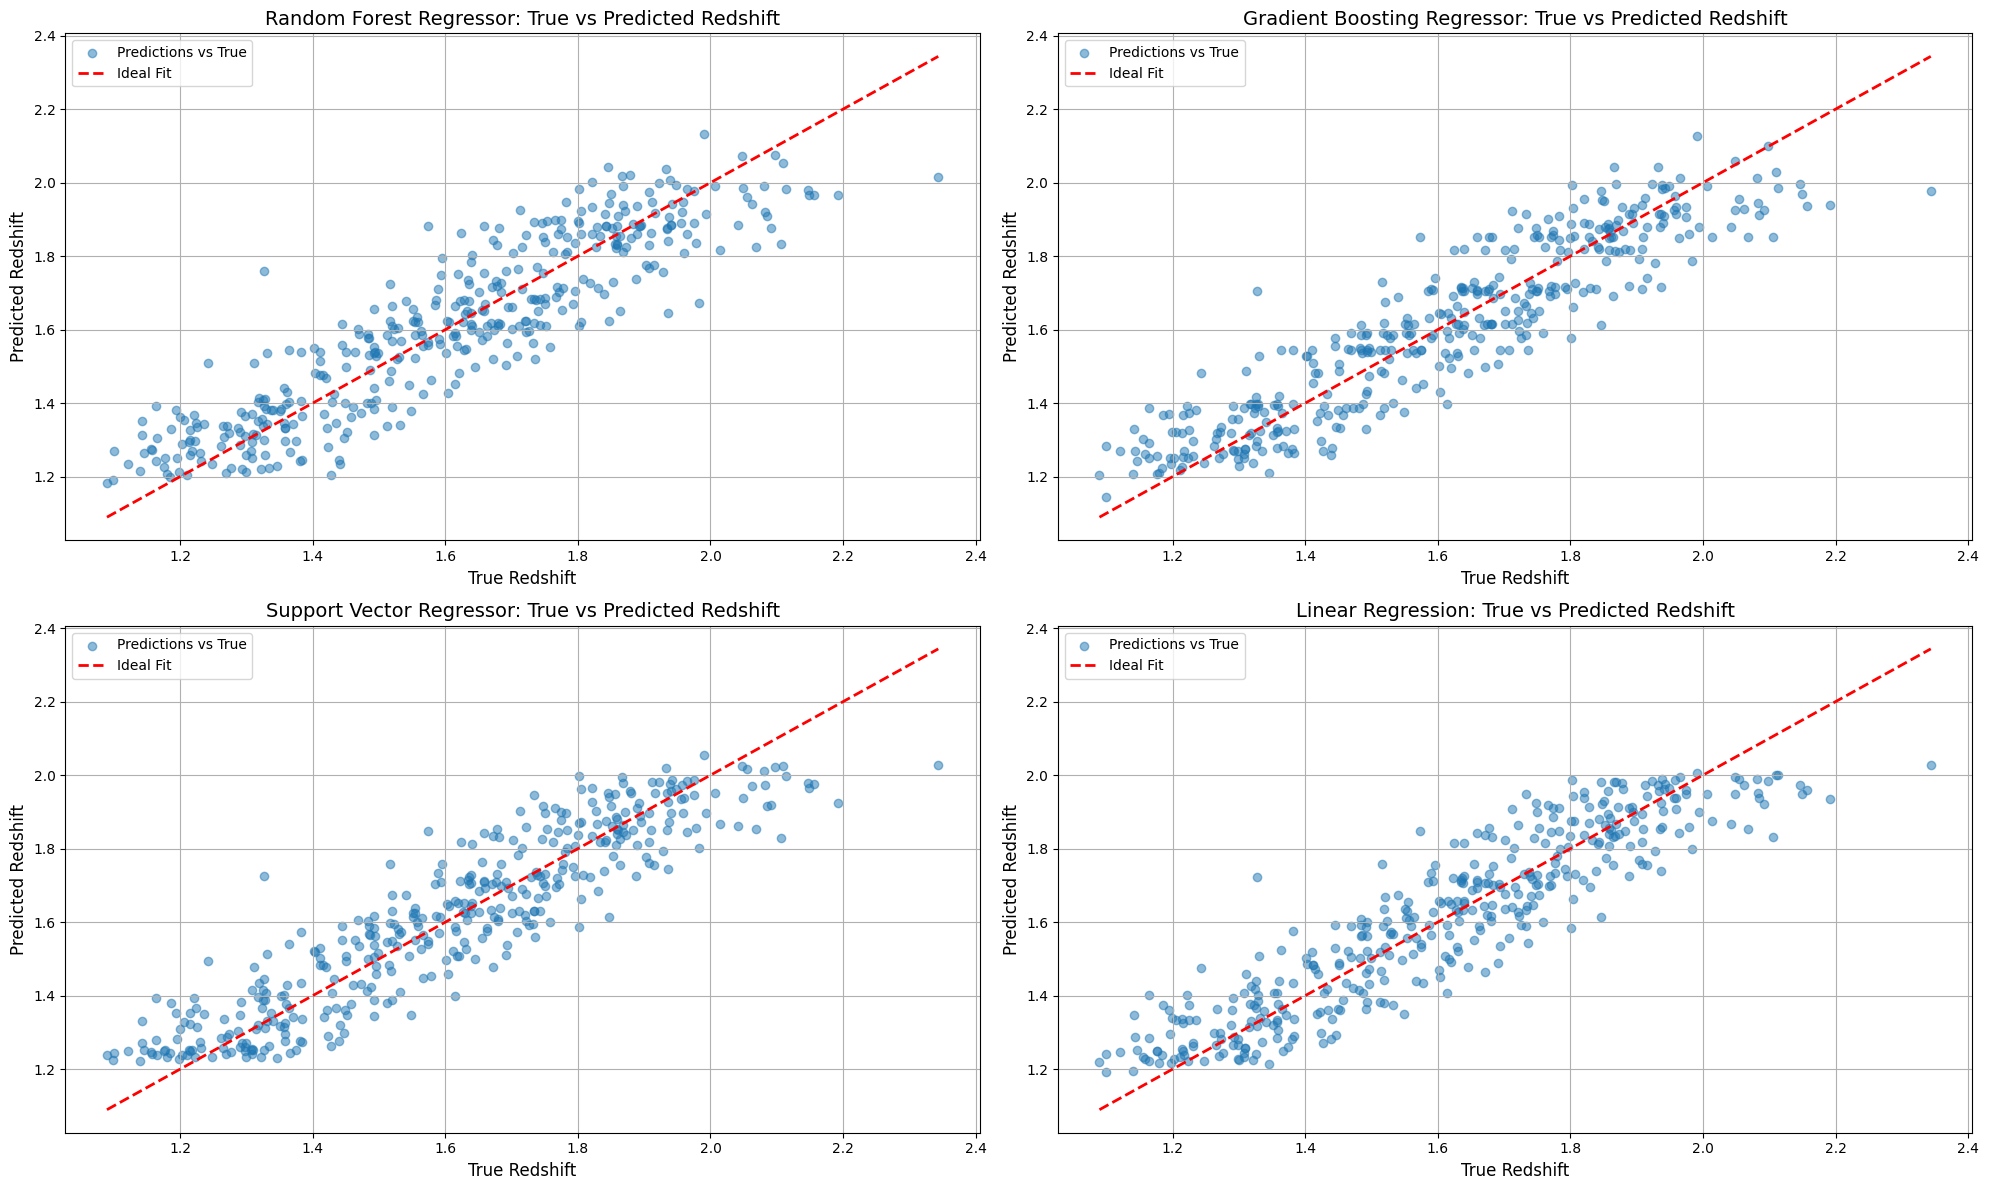

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

# Synthetic Data Generation (based on SDSS features)
# Assuming we have 5 features representing photometric data (ugriz filters)
N = 2000  # Number of data points
u = np.random.uniform(15, 25, N)
g = u - np.random.normal(1, 0.3, N)
r = g - np.random.normal(0.5, 0.2, N)
i = r - np.random.normal(0.3, 0.1, N)
z = i - np.random.normal(0.2, 0.1, N)
redshift = 0.1 * u - 0.05 * g + 0.03 * r + np.random.normal(0, 0.1, N)  # Synthetic redshift relation

# Create DataFrame to hold the synthetic data
data = pd.DataFrame({'u': u, 'g': g, 'r': r, 'i': i, 'z': z, 'redshift': redshift})

# Exploratory Data Analysis (EDA)
print("\n--- Exploratory Data Analysis (EDA) ---\n")

# Summary statistics
print("Summary Statistics:\n", data.describe())

# Histograms of the features
data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

# Pairplot to visualize relationships between features and redshift
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Additional EDA - Boxplots to detect outliers for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}', fontsize=12)
plt.tight_layout()
plt.show()

# Additional EDA - Distribution plots for each feature to check skewness
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {column}', fontsize=12)
plt.tight_layout()
plt.show()

# Additional EDA - Pairwise correlation between features and target using scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['u', 'g', 'r', 'i', 'z'], 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[column], data['redshift'], alpha=0.5)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Redshift', fontsize=12)
    plt.title(f'{column} vs Redshift', fontsize=12)
plt.tight_layout()
plt.show()

# Additional EDA - Check skewness and kurtosis of the features
print("\nSkewness of features:")
print(data.skew())
print("\nKurtosis of features:")
print(data.kurtosis())

# Splitting the dataset into training and testing sets
X = data[['u', 'g', 'r', 'i', 'z']]
y = data['redshift']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionary to store model information
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(kernel='rbf'),
    "Linear Regression": LinearRegression()
}

# Dictionary to store predictions and evaluation metrics
results = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'y_pred': y_pred,
        'MSE': mse,
        'R2': r2
    }
    print(f"\n{name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R^2: {r2:.4f}")

# Visualization: Plotting all models side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for ax, (name, result) in zip(axes, results.items()):
    ax.scatter(y_test, result['y_pred'], alpha=0.5, label='Predictions vs True')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    ax.set_xlabel('True Redshift', fontsize=12)
    ax.set_ylabel('Predicted Redshift', fontsize=12)
    ax.set_title(f'{name}: True vs Predicted Redshift', fontsize=14)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

This Python script implements a comprehensive pipeline for analyzing synthetic photometric data and predicting redshift using machine learning models. It uses libraries like NumPy, pandas, Matplotlib, Seaborn, and scikit-learn to generate synthetic SDSS-based data, visualize feature distributions, and perform statistical analyses. The code includes functions for data preprocessing, univariate and bivariate analyses, and splitting the data into training and testing sets. It trains multiple regression models (Random Forest, Gradient Boosting, SVR, and Linear Regression) using scikit-learn pipelines and GridSearchCV for hyperparameter tuning. The evaluation metrics (MSE, MAE, R²) and model predictions are logged and compared, and visualizations like scatterplots and a heatmap illustrate feature relationships and model performance. The script is modular, enabling efficient experimentation and insights into photometric data analysis.

                                                              model                                            metrics
RandomForest      (StandardScaler(), (DecisionTreeRegressor(max_...  {'MSE': 0.011535870686389975, 'MAE': 0.0866998...
GradientBoosting  (StandardScaler(), ([DecisionTreeRegressor(cri...  {'MSE': 0.010554645127488488, 'MAE': 0.0828108...
SVR                                    (StandardScaler(), SVR(C=1))  {'MSE': 0.010355361904978712, 'MAE': 0.0820628...
LinearRegression             (StandardScaler(), LinearRegression())  {'MSE': 0.010420997327696467, 'MAE': 0.0820641...


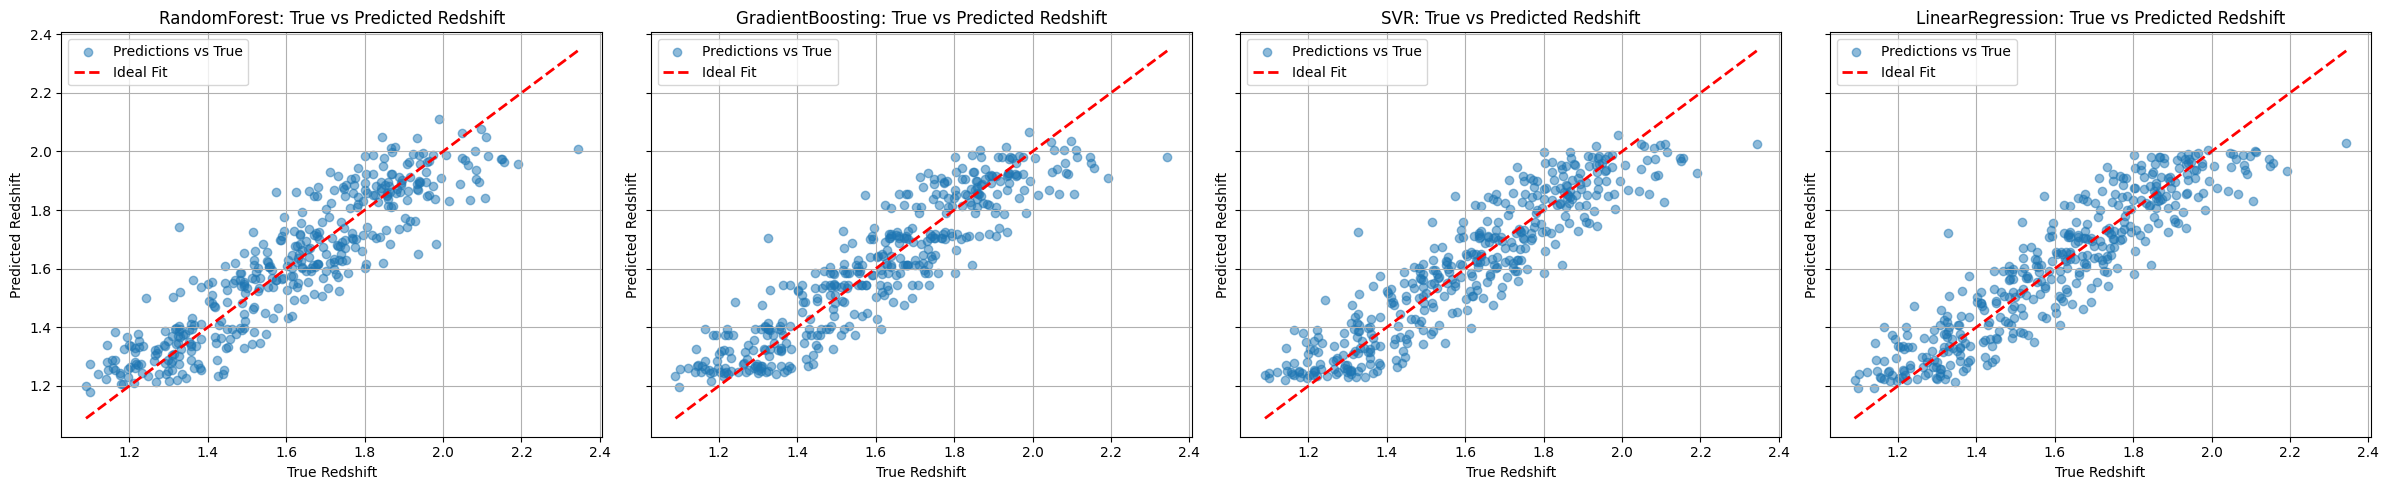

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s:%(message)s')

def generate_synthetic_data(N=2000, random_state=42):
    """
    Generate synthetic photometric data based on SDSS features.

    Parameters:
    - N: int, number of data points
    - random_state: int, seed for reproducibility

    Returns:
    - DataFrame containing synthetic data
    """
    np.random.seed(random_state)

    u = np.random.uniform(15, 25, N)
    g = u - np.random.normal(1, 0.3, N)
    r = g - np.random.normal(0.5, 0.2, N)
    i = r - np.random.normal(0.3, 0.1, N)
    z = i - np.random.normal(0.2, 0.1, N)
    redshift = 0.1 * u - 0.05 * g + 0.03 * r + np.random.normal(0, 0.1, N)

    data = pd.DataFrame({'u': u, 'g': g, 'r': r, 'i': i, 'z': z, 'redshift': redshift})
    logging.info("Synthetic data generated successfully.")
    return data

def basic_overview(data):
    """
    Provide a basic overview of the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Basic Data Overview:")
    print("First 5 rows:")
    print(data.head())
    print("\nData Types:")
    print(data.dtypes)
    print("\nShape of the dataset:")
    print(data.shape)

def descriptive_statistics(data):
    """
    Display descriptive statistics of the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Descriptive Statistics:")
    print(data.describe())

def check_missing_values(data):
    """
    Check for missing values in the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Checking for Missing Values:")
    missing = data.isnull().sum()
    print(missing)

import seaborn as sns

def univariate_analysis(data):
    """
    Perform univariate analysis on the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Univariate Analysis:")
    features = ['u', 'g', 'r', 'i', 'z', 'redshift']
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

def bivariate_analysis(data):
    """
    Perform bivariate analysis between features.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Bivariate Analysis:")
    features = ['u', 'g', 'r', 'i', 'z']
    target = 'redshift'
    for feature in features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.5)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

def correlation_analysis(data):
    """
    Analyze correlations between features and the target.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Correlation Analysis:")
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Correlation with target
    target_corr = corr_matrix['redshift'].drop('redshift').sort_values(ascending=False)
    print("\nCorrelation of features with redshift:")
    print(target_corr)

def pairplot(data):
    """
    Create a pairplot to visualize relationships between features.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Creating Pairplot:")
    sns.pairplot(data, diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Features', y=1.02)
    plt.show()

def split_data(data, test_size=0.2, random_state=42):
    """
    Split the dataset into training and testing sets.

    Parameters:
    - data: DataFrame, the dataset
    - test_size: float, proportion of the dataset to include in the test split
    - random_state: int, seed for reproducibility

    Returns:
    - X_train, X_test, y_train, y_test: split datasets
    """
    X = data[['u', 'g', 'r', 'i', 'z']]
    y = data['redshift']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    logging.info(f"Data split into training and testing sets with test size {test_size}.")
    return X_train, X_test, y_train, y_test

def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate the model performance and log the metrics.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - model_name: str, name of the model

    Returns:
    - metrics: dict, containing MSE, MAE, and R^2 scores
    """
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    logging.info(f"{model_name} Performance:")
    logging.info(f"  MSE: {mse:.4f}")
    logging.info(f"  MAE: {mae:.4f}")
    logging.info(f"  R^2: {r2:.4f}")
    return {'MSE': mse, 'MAE': mae, 'R2': r2}

def plot_predictions(y_true, y_pred, model_name, ax=None):
    """
    Plot true vs predicted values.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - model_name: str, name of the model
    - ax: matplotlib.axes.Axes, optional axis to plot on

    Returns:
    - None
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(y_true, y_pred, alpha=0.5, label='Predictions vs True')
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
             'r--', lw=2, label='Ideal Fit')
    ax.set_xlabel('True Redshift')
    ax.set_ylabel('Predicted Redshift')
    ax.set_title(f'{model_name}: True vs Predicted Redshift')
    ax.legend()
    ax.grid(True)
    # If ax was not provided, show the plot
    if ax is None:
        plt.tight_layout()
        plt.show()

def train_and_evaluate_model(model, pipeline_steps, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Train the model with optional hyperparameter tuning and evaluate its performance.

    Parameters:
    - model: estimator, the machine learning model
    - pipeline_steps: list of tuples, steps for the pipeline
    - param_grid: dict, parameter grid for GridSearchCV
    - X_train, y_train: training data
    - X_test, y_test: testing data
    - model_name: str, name of the model

    Returns:
    - best_estimator: estimator, the best model found by GridSearchCV
    - metrics: dict, evaluation metrics
    - y_pred: array-like, predicted target values
    """
    pipeline = Pipeline(pipeline_steps + [(model_name, model)])

    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        logging.info(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    y_pred = best_model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred, model_name)
    # Removed individual plot_predictions call to handle plotting later
    return best_model, metrics, y_pred

def main():
    # Generate synthetic data
    data = generate_synthetic_data()

    # Optionally perform data analysis
    # basic_overview(data)
    # descriptive_statistics(data)
    # check_missing_values(data)
    # univariate_analysis(data)
    # bivariate_analysis(data)
    # correlation_analysis(data)
    # pairplot(data)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(data)

    # Define preprocessing steps
    pipeline_steps = [('scaler', StandardScaler())]

    # Define models and their hyperparameter grids
    models = {
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'param_grid': {
                'RandomForest__n_estimators': [100, 200],
                'RandomForest__max_depth': [None, 10, 20],
                'RandomForest__min_samples_split': [2, 5]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'param_grid': {
                'GradientBoosting__n_estimators': [100, 200],
                'GradientBoosting__learning_rate': [0.1, 0.05],
                'GradientBoosting__max_depth': [3, 5]
            }
        },
        'SVR': {
            'model': SVR(kernel='rbf'),
            'param_grid': {
                'SVR__C': [1, 10],
                'SVR__gamma': ['scale', 'auto']
            }
        },
        'LinearRegression': {
            'model': LinearRegression(),
            'param_grid': None  # No hyperparameters to tune
        }
    }

    # Dictionary to store results
    results = {}
    predictions = {}

    # Iterate over models
    for model_name, model_info in models.items():
        logging.info(f"Training and evaluating {model_name}...")
        best_model, metrics, y_pred = train_and_evaluate_model(
            model=model_info['model'],
            pipeline_steps=pipeline_steps,
            param_grid=model_info['param_grid'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            model_name=model_name
        )
        results[model_name] = {
            'model': best_model,
            'metrics': metrics
        }
        predictions[model_name] = y_pred  # Store predictions for later plotting

    # Compare all models
    comparison_df = pd.DataFrame({
        model: metrics for model, metrics in results.items()
    }).T
    logging.info("Model comparison:")
    print(comparison_df)

    # Visualize all model predictions side by side
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5), sharey=True)

    for ax, (model_name, y_pred) in zip(axes, predictions.items()):
        ax.scatter(y_test, y_pred, alpha=0.5, label='Predictions vs True')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 'r--', lw=2, label='Ideal Fit')
        ax.set_xlabel('True Redshift')
        ax.set_ylabel('Predicted Redshift')
        ax.set_title(f'{model_name}: True vs Predicted Redshift')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


                                                              model  \
RandomForest      (StandardScaler(), (DecisionTreeRegressor(max_...   
GradientBoosting  (StandardScaler(), ([DecisionTreeRegressor(cri...   
SVR                                    (StandardScaler(), SVR(C=1))   
LinearRegression             (StandardScaler(), LinearRegression())   

                                                            metrics  
RandomForest      {'MSE': 0.011535870686389975, 'RMSE': 0.107405...  
GradientBoosting  {'MSE': 0.010554645127488488, 'RMSE': 0.102735...  
SVR               {'MSE': 0.010355361904978712, 'RMSE': 0.101761...  
LinearRegression  {'MSE': 0.010420997327696467, 'RMSE': 0.102083...  


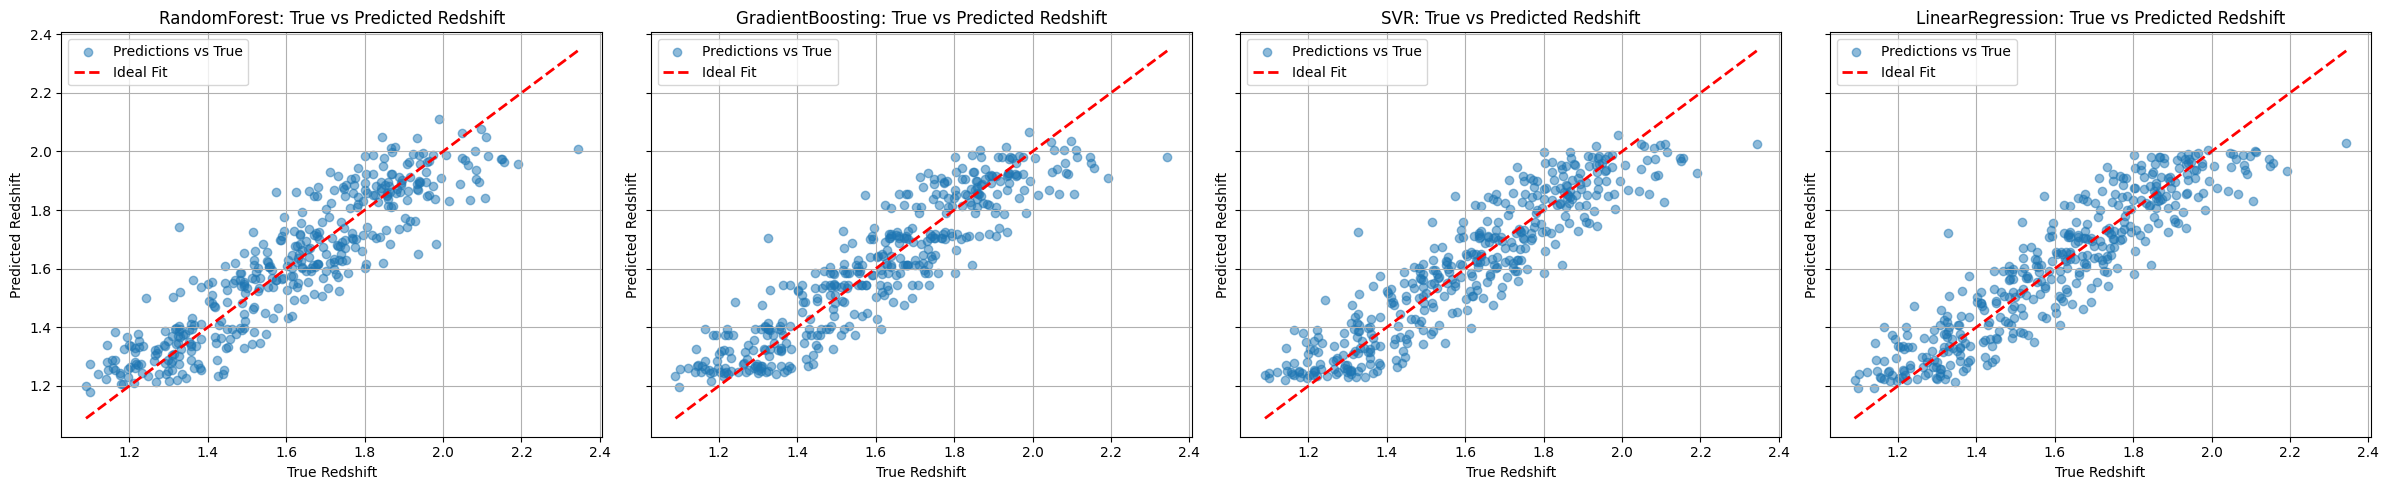

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    median_absolute_error,
    r2_score,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s:%(message)s')


def generate_synthetic_data(N=2000, random_state=42):
    """
    Generate synthetic photometric data based on SDSS features.

    Parameters:
    - N: int, number of data points
    - random_state: int, seed for reproducibility

    Returns:
    - DataFrame containing synthetic data
    """
    np.random.seed(random_state)

    u = np.random.uniform(15, 25, N)
    g = u - np.random.normal(1, 0.3, N)
    r = g - np.random.normal(0.5, 0.2, N)
    i = r - np.random.normal(0.3, 0.1, N)
    z = i - np.random.normal(0.2, 0.1, N)
    redshift = 0.1 * u - 0.05 * g + 0.03 * r + np.random.normal(0, 0.1, N)

    data = pd.DataFrame({'u': u, 'g': g, 'r': r, 'i': i, 'z': z, 'redshift': redshift})
    logging.info("Synthetic data generated successfully.")
    return data


def basic_overview(data):
    """
    Provide a basic overview of the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Basic Data Overview:")
    print("First 5 rows:")
    print(data.head())
    print("\nData Types:")
    print(data.dtypes)
    print("\nShape of the dataset:")
    print(data.shape)


def descriptive_statistics(data):
    """
    Display descriptive statistics of the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Descriptive Statistics:")
    print(data.describe())


def check_missing_values(data):
    """
    Check for missing values in the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Checking for Missing Values:")
    missing = data.isnull().sum()
    print(missing)


def univariate_analysis(data):
    """
    Perform univariate analysis on the dataset.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Univariate Analysis:")
    features = ['u', 'g', 'r', 'i', 'z', 'redshift']
    for feature in features:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


def bivariate_analysis(data):
    """
    Perform bivariate analysis between features.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Bivariate Analysis:")
    features = ['u', 'g', 'r', 'i', 'z']
    target = 'redshift'
    for feature in features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.5)
        plt.title(f'{target} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()


def correlation_analysis(data):
    """
    Analyze correlations between features and the target.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Correlation Analysis:")
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Correlation with target
    target_corr = corr_matrix['redshift'].drop('redshift').sort_values(ascending=False)
    print("\nCorrelation of features with redshift:")
    print(target_corr)


def pairplot(data):
    """
    Create a pairplot to visualize relationships between features.

    Parameters:
    - data: DataFrame, the dataset

    Returns:
    - None
    """
    logging.info("Creating Pairplot:")
    sns.pairplot(data, diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Features', y=1.02)
    plt.show()


def split_data(data, test_size=0.2, random_state=42):
    """
    Split the dataset into training and testing sets.

    Parameters:
    - data: DataFrame, the dataset
    - test_size: float, proportion of the dataset to include in the test split
    - random_state: int, seed for reproducibility

    Returns:
    - X_train, X_test, y_train, y_test: split datasets
    """
    X = data[['u', 'g', 'r', 'i', 'z']]
    y = data['redshift']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    logging.info(f"Data split into training and testing sets with test size {test_size}.")
    return X_train, X_test, y_train, y_test


def evaluate_model(y_true, y_pred, model_name):
    """
    Evaluate the model performance and log the metrics.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - model_name: str, name of the model

    Returns:
    - metrics: dict, containing all evaluation metrics
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    nmae = mae / (y_true.max() - y_true.min())
    med_ae = median_absolute_error(y_true, y_pred)
    nmad = 1.48 * np.median(np.abs((y_true - y_pred) / (1 + y_true)))
    bias = np.mean(y_pred - y_true)
    fractional_error = np.mean(np.abs(y_true - y_pred) / (1 + y_true) < 0.05)
    catastrophic_rate = np.mean(np.abs(y_true - y_pred) / (1 + y_true) > 0.15)
    smape = 100 * np.mean(
        2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))
    )
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X_test.shape[1]  # Number of predictors
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    logging.info(f"{model_name} Performance:")
    logging.info(f"  MSE: {mse:.4f}")
    logging.info(f"  RMSE: {rmse:.4f}")
    logging.info(f"  MAE: {mae:.4f}")
    logging.info(f"  NMAE: {nmae:.4f}")
    logging.info(f"  Median AE: {med_ae:.4f}")
    logging.info(f"  NMAD: {nmad:.4f}")
    logging.info(f"  Bias: {bias:.4f}")
    logging.info(f"  Fractional Error < 0.05: {fractional_error:.4f}")
    logging.info(f"  Catastrophic Outlier Rate > 0.15: {catastrophic_rate:.4f}")
    logging.info(f"  SMAPE: {smape:.2f}%")
    logging.info(f"  R²: {r2:.4f}")
    logging.info(f"  Adjusted R²: {adj_r2:.4f}")

    return {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'NMAE': nmae,
        'Median AE': med_ae,
        'NMAD': nmad,
        'Bias': bias,
        'Fractional Error <0.05': fractional_error,
        'Catastrophic Outlier Rate >0.15': catastrophic_rate,
        'SMAPE (%)': smape,
        'R2': r2,
        'Adjusted R2': adj_r2
    }


def plot_predictions(y_true, y_pred, model_name, ax=None):
    """
    Plot true vs predicted values.

    Parameters:
    - y_true: array-like, true target values
    - y_pred: array-like, predicted target values
    - model_name: str, name of the model
    - ax: matplotlib.axes.Axes, optional axis to plot on

    Returns:
    - None
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(y_true, y_pred, alpha=0.5, label='Predictions vs True')
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
             'r--', lw=2, label='Ideal Fit')
    ax.set_xlabel('True Redshift')
    ax.set_ylabel('Predicted Redshift')
    ax.set_title(f'{model_name}: True vs Predicted Redshift')
    ax.legend()
    ax.grid(True)
    # If ax was not provided, show the plot
    if ax is None:
        plt.tight_layout()
        plt.show()


def train_and_evaluate_model(model, pipeline_steps, param_grid, X_train, y_train, X_test, y_test, model_name):
    """
    Train the model with optional hyperparameter tuning and evaluate its performance.

    Parameters:
    - model: estimator, the machine learning model
    - pipeline_steps: list of tuples, steps for the pipeline
    - param_grid: dict, parameter grid for GridSearchCV
    - X_train, y_train: training data
    - X_test, y_test: testing data
    - model_name: str, name of the model

    Returns:
    - best_estimator: estimator, the best model found by GridSearchCV
    - metrics: dict, evaluation metrics
    - y_pred: array-like, predicted target values
    """
    pipeline = Pipeline(pipeline_steps + [(model_name, model)])

    if param_grid:
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        logging.info(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline

    y_pred = best_model.predict(X_test)
    metrics = evaluate_model(y_test, y_pred, model_name)
    # Removed individual plot_predictions call to handle plotting later
    return best_model, metrics, y_pred


def main():
    # Generate synthetic data
    data = generate_synthetic_data()

    # Optionally perform data analysis
    # basic_overview(data)
    # descriptive_statistics(data)
    # check_missing_values(data)
    # univariate_analysis(data)
    # bivariate_analysis(data)
    # correlation_analysis(data)
    # pairplot(data)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(data)

    # Define preprocessing steps
    pipeline_steps = [('scaler', StandardScaler())]

    # Define models and their hyperparameter grids
    models = {
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'param_grid': {
                'RandomForest__n_estimators': [100, 200],
                'RandomForest__max_depth': [None, 10, 20],
                'RandomForest__min_samples_split': [2, 5]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'param_grid': {
                'GradientBoosting__n_estimators': [100, 200],
                'GradientBoosting__learning_rate': [0.1, 0.05],
                'GradientBoosting__max_depth': [3, 5]
            }
        },
        'SVR': {
            'model': SVR(kernel='rbf'),
            'param_grid': {
                'SVR__C': [1, 10],
                'SVR__gamma': ['scale', 'auto']
            }
        },
        'LinearRegression': {
            'model': LinearRegression(),
            'param_grid': None  # No hyperparameters to tune
        }
    }

    # Dictionary to store results
    results = {}
    predictions = {}

    # Iterate over models
    for model_name, model_info in models.items():
        logging.info(f"Training and evaluating {model_name}...")
        best_model, metrics, y_pred = train_and_evaluate_model(
            model=model_info['model'],
            pipeline_steps=pipeline_steps,
            param_grid=model_info['param_grid'],
            X_train=X_train,
            y_train=y_train,
            X_test=X_test,
            y_test=y_test,
            model_name=model_name
        )
        results[model_name] = {
            'model': best_model,
            'metrics': metrics
        }
        predictions[model_name] = y_pred  # Store predictions for later plotting

    # Compare all models
    comparison_df = pd.DataFrame({
        model: metrics for model, metrics in results.items()
    }).T
    logging.info("Model comparison:")
    print(comparison_df)

    # Visualize all model predictions side by side
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5), sharey=True)

    for ax, (model_name, y_pred) in zip(axes, predictions.items()):
        ax.scatter(y_test, y_pred, alpha=0.5, label='Predictions vs True')
        ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                 'r--', lw=2, label='Ideal Fit')
        ax.set_xlabel('True Redshift')
        ax.set_ylabel('Predicted Redshift')
        ax.set_title(f'{model_name}: True vs Predicted Redshift')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
